# Packages

In [1]:
import numpy              as np
import pandas             as pd
import matplotlib.pyplot  as plt
import seaborn            as sns
import scipy.interpolate  as s
import arviz
import time
import os
from mpl_toolkits.mplot3d import Axes3D

# Paths and dataset

In [2]:
results_path = '../../LargeFilesResults/Model'  # where the outputs of this notebook will be saved

In [3]:
my_summary = pd.read_csv(os.path.join(results_path, 'allprobabilities_summ_rmshared_revised.csv'), 
                         index_col="Unnamed: 0")
posteriors = pd.read_csv(os.path.join(results_path, 'posteriors_rmshared_revised.csv'))

# Posteriors

In [4]:
whan_classes = ['Not classified', 'Retired/Passive', 'wAGN', 'sAGN', 'SF']
palette      = np.array(['#8c510a','#bf812d','#80cdc1','#35978f','#01665e'])
figsize      = (15, 15)
alpha        = 0.6

In [5]:
dimensions = posteriors.columns.values.reshape(5,5)
rows       = dimensions[:,0].size
columns    = dimensions[0,:].size

/home/mlldantas/anaconda3/envs/py3k6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


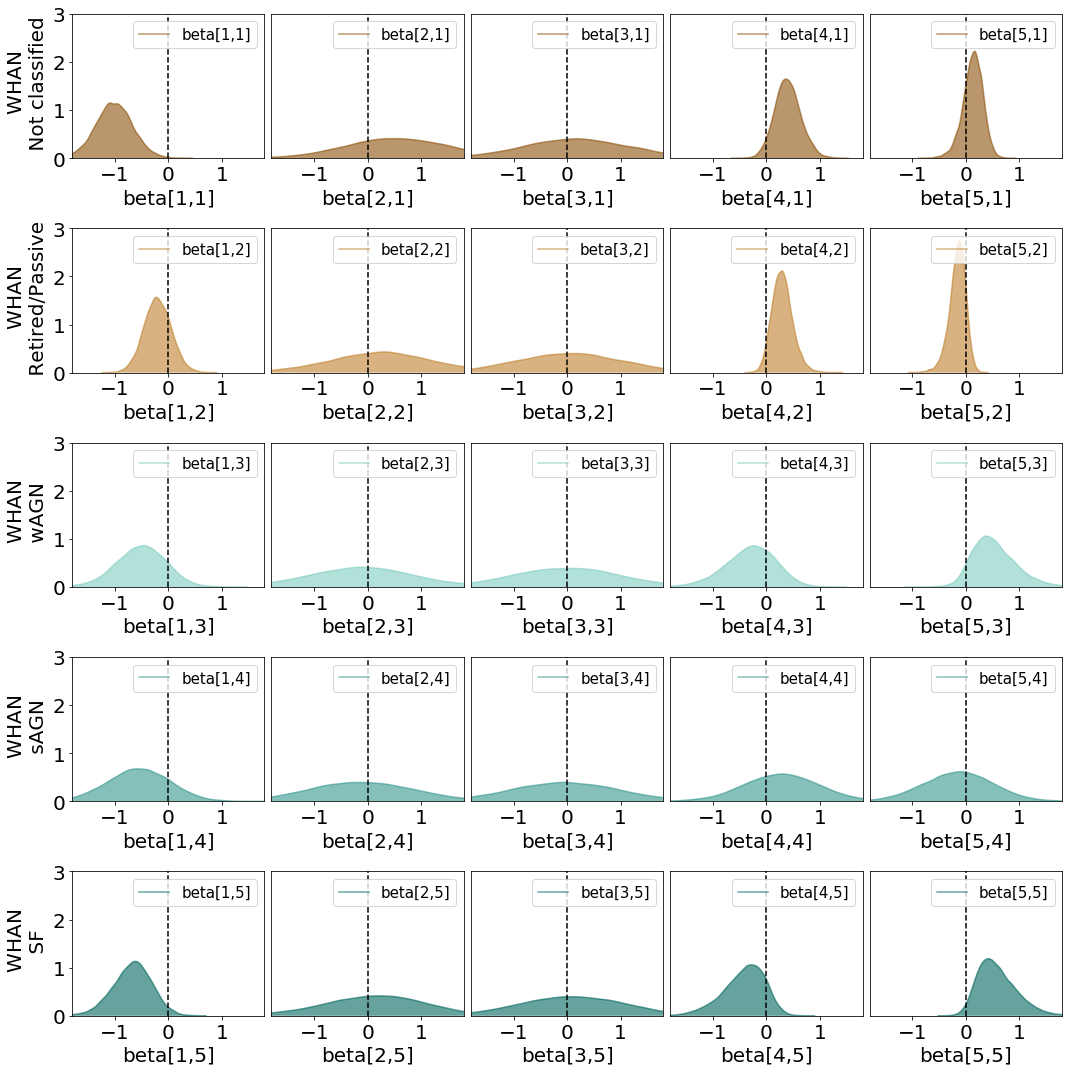

In [6]:
plt.subplots(figsize=figsize)
position = 1
for each_beta in range(rows):
    for each_class in range(columns):
        name_temp = posteriors.columns.values.reshape(rows, columns)[each_beta,each_class]
        plot_temp = plt.subplot(rows, columns, position)
        sns.kdeplot(posteriors['%s' % str(name_temp)], shade=True, alpha=alpha, color=palette[each_beta])
        plt.legend(loc='upper right', fontsize=15)
        plt.axvline(x=0, linestyle="--", color='black')
        plt.xlabel(r"%s" % str(name_temp), fontsize=20)
        plt.tick_params('both', labelsize='20')
        plt.xlim([-1.8,1.8])
        plt.ylim([0,3.])      
        if (each_class==0):
            plt.ylabel("$\,$ WHAN \n %s" % whan_classes[each_beta], fontsize=20)       
        elif (each_class!=0): 
            plot_temp.yaxis.set_visible(False)            
        position+=1

plt.tight_layout(w_pad=0)
plt.savefig(os.path.join(results_path, '25betas_rmshared_revised.png'), bbox_inch='tight')
plt.savefig(os.path.join(results_path, '25betas_rmshared_revised.pdf'), bbox_inch='tight')
plt.show()

# Probability x Mass

In [7]:
header = my_summary.keys()

In [8]:
class01, class02, class03, class04, class05 = np.split(my_summary.values, 5)

In [9]:
class01_df = pd.DataFrame(class01)
class01_df.columns = header

In [10]:
class02_df = pd.DataFrame(class02)
class02_df.columns = header

In [11]:
class03_df = pd.DataFrame(class03)
class03_df.columns = header

In [12]:
class04_df = pd.DataFrame(class04)
class04_df.columns = header

In [13]:
class05_df = pd.DataFrame(class05)
class05_df.columns = header

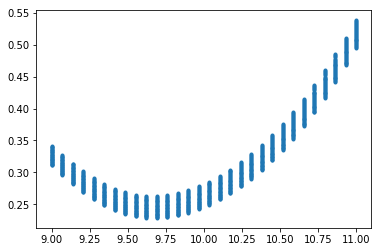

In [14]:
plt.plot(class01_df["LOG_STELLAR_MASS"], class01_df["mean"], '.')
plt.show()

In [15]:
class01_df.describe()

,count,mean,std,min,2.5%,25%,50%,75%,97.5%,max,LOG_STELLAR_MASS,Z
count,900.0,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,15000.0,0.317834,0.098839,0.078727,0.154929,0.243898,0.308479,0.382745,0.530011,0.723702,10.000000,0.208120
std,0.0,0.077758,0.048235,0.059604,0.095010,0.090935,0.081309,0.084346,0.128465,0.156243,0.597259,0.083724
min,15000.0,0.228763,0.053748,0.000236,0.011287,0.119281,0.222864,0.269673,0.355733,0.471809,9.000000,0.067940
25%,15000.0,0.258921,0.068109,0.016589,0.069893,0.170137,0.249216,0.311888,0.421304,0.591700,9.482759,0.135613
50%,15000.0,0.290796,0.078155,0.080897,0.156506,0.220641,0.273297,0.361465,0.505485,0.696158,10.000000,0.208120
75%,15000.0,0.354513,0.108410,0.119862,0.222679,0.301383,0.350435,0.442965,0.616755,0.858535,10.517241,0.280627
max,15000.0,0.538128,0.239366,0.187483,0.349832,0.469713,0.539332,0.606858,0.849140,0.995086,11.000000,0.348300


In [16]:
unique_masses = np.unique(class01_df["LOG_STELLAR_MASS"].values)

### class 01 - unclassified

In [17]:
for i in range(unique_masses.size):
    if i==0:
        summary_temp  = pd.DataFrame(class01_df[class01_df["LOG_STELLAR_MASS"].values==unique_masses[i]].describe())
        mean_temp     = summary_temp.loc[["mean"]]
        mean_all01_df = mean_temp
    else:
        summary_temp  = pd.DataFrame(class01_df[class01_df["LOG_STELLAR_MASS"].values==unique_masses[i]].describe())
        mean_temp     = summary_temp.loc[["mean"]]
        mean_all01_df = pd.concat([mean_all01_df, mean_temp])

### class 02 - retired/passive

In [18]:
for i in range(unique_masses.size):
    if i==0:
        summary_temp  = pd.DataFrame(class02_df[class02_df["LOG_STELLAR_MASS"].values==unique_masses[i]].describe())
        mean_temp     = summary_temp.loc[["mean"]]
        mean_all02_df = mean_temp
    else:
        summary_temp  = pd.DataFrame(class02_df[class02_df["LOG_STELLAR_MASS"].values==unique_masses[i]].describe())
        mean_temp     = summary_temp.loc[["mean"]]
        mean_all02_df = pd.concat([mean_all02_df, mean_temp])

### class 03 - wAGN

In [19]:
for i in range(unique_masses.size):
    if i==0:
        summary_temp  = pd.DataFrame(class03_df[class03_df["LOG_STELLAR_MASS"].values==unique_masses[i]].describe())
        mean_temp     = summary_temp.loc[["mean"]]
        mean_all03_df = mean_temp
    else:
        summary_temp  = pd.DataFrame(class03_df[class03_df["LOG_STELLAR_MASS"].values==unique_masses[i]].describe())
        mean_temp     = summary_temp.loc[["mean"]]
        mean_all03_df = pd.concat([mean_all03_df, mean_temp])

### class 04 - sAGN

In [20]:
for i in range(unique_masses.size):
    if i==0:
        summary_temp  = pd.DataFrame(class04_df[class04_df["LOG_STELLAR_MASS"].values==unique_masses[i]].describe())
        mean_temp     = summary_temp.loc[["mean"]]
        mean_all04_df = mean_temp
    else:
        summary_temp  = pd.DataFrame(class04_df[class04_df["LOG_STELLAR_MASS"].values==unique_masses[i]].describe())
        mean_temp     = summary_temp.loc[["mean"]]
        mean_all04_df = pd.concat([mean_all04_df, mean_temp])

### class 05 - SF

In [21]:
for i in range(unique_masses.size):
    if i==0:
        summary_temp  = pd.DataFrame(class05_df[class05_df["LOG_STELLAR_MASS"].values==unique_masses[i]].describe())
        mean_temp     = summary_temp.loc[["mean"]]
        mean_all05_df = mean_temp
    else:
        summary_temp  = pd.DataFrame(class05_df[class05_df["LOG_STELLAR_MASS"].values==unique_masses[i]].describe())
        mean_temp     = summary_temp.loc[["mean"]]
        mean_all05_df = pd.concat([mean_all05_df, mean_temp])

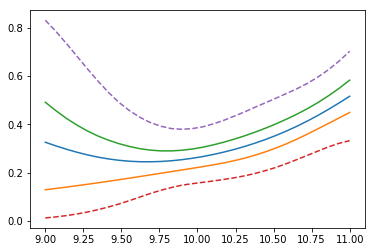

In [22]:
plt.plot(mean_all01_df['LOG_STELLAR_MASS'], mean_all01_df['mean'], '-')
plt.plot(mean_all01_df['LOG_STELLAR_MASS'], mean_all01_df['25%'], '-')
plt.plot(mean_all01_df['LOG_STELLAR_MASS'], mean_all01_df['75%'], '-')
plt.plot(mean_all01_df['LOG_STELLAR_MASS'], mean_all01_df['2.5%'], '--')
plt.plot(mean_all01_df['LOG_STELLAR_MASS'], mean_all01_df['97.5%'], '--')

plt.show()

In [23]:
n_classes = np.split(my_summary.values, 5)

In [24]:
list_of_dfs = [mean_all01_df, mean_all02_df, mean_all03_df, mean_all04_df, mean_all05_df]

In [25]:
for n in range(len(n_classes)):
    list_of_dfs[n].to_csv(os.path.join(results_path, 'data_for_plotting_class%d.csv' % (n+1)))

In [26]:
print(unique_masses)

[ 9.          9.06896552  9.13793103  9.20689655  9.27586207  9.34482759
  9.4137931   9.48275862  9.55172414  9.62068966  9.68965517  9.75862069
  9.82758621  9.89655172  9.96551724 10.03448276 10.10344828 10.17241379
 10.24137931 10.31034483 10.37931034 10.44827586 10.51724138 10.5862069
 10.65517241 10.72413793 10.79310345 10.86206897 10.93103448 11.        ]


# Probability x Z ---  to be continued

In [ ]:
unique_redshifts = np.unique(my_summary['Z'].values)

In [ ]:
mass_slices = [unique_masses[0], unique_masses[15], unique_masses[29]]
print (mass_slices[0])

### class 01 - unclassified

In [ ]:
for i in range(unique_redshifts.size):
    if i==0:
        idx_temp = np.where((class01_df["Z"].values==unique_redshifts[i])*
                            (class01_df["LOG_STELLAR_MASS"]==mass_slices.any()))
        summary_temp  = pd.DataFrame(class01_df[class01_df["Z"].values==unique_redshifts[i]].describe())
#         mean_temp     = summary_temp.loc[["mean"]]
#         mean_all01_df = mean_temp
#     else:
        summary_temp  = pd.DataFrame(class01_df[class01_df["Z"].values==unique_redshifts[i]].describe())
#         mean_temp     = summary_temp.loc[["mean"]]
#         mean_all01_df = pd.concat([mean_all01_df, mean_temp])

### class 02 - retired/passive

In [ ]:
for i in range(unique_redshifts.size):
    if i==0:
        summary_temp  = pd.DataFrame(class02_df[class02_df["LOG_STELLAR_MASS"].values==unique_masses[i]].describe())
        mean_temp     = summary_temp.loc[["mean"]]
        mean_all02_df = mean_temp
    else:
        summary_temp  = pd.DataFrame(class02_df[class02_df["LOG_STELLAR_MASS"].values==unique_masses[i]].describe())
        mean_temp     = summary_temp.loc[["mean"]]
        mean_all02_df = pd.concat([mean_all02_df, mean_temp])

### class 03 - wAGN

In [ ]:
for i in range(unique_masses.size):
    if i==0:
        summary_temp  = pd.DataFrame(class03_df[class03_df["LOG_STELLAR_MASS"].values==unique_masses[i]].describe())
        mean_temp     = summary_temp.loc[["mean"]]
        mean_all03_df = mean_temp
    else:
        summary_temp  = pd.DataFrame(class03_df[class03_df["LOG_STELLAR_MASS"].values==unique_masses[i]].describe())
        mean_temp     = summary_temp.loc[["mean"]]
        mean_all03_df = pd.concat([mean_all03_df, mean_temp])

### class 04 - sAGN

In [ ]:
for i in range(unique_masses.size):
    if i==0:
        summary_temp  = pd.DataFrame(class04_df[class04_df["LOG_STELLAR_MASS"].values==unique_masses[i]].describe())
        mean_temp     = summary_temp.loc[["mean"]]
        mean_all04_df = mean_temp
    else:
        summary_temp  = pd.DataFrame(class04_df[class04_df["LOG_STELLAR_MASS"].values==unique_masses[i]].describe())
        mean_temp     = summary_temp.loc[["mean"]]
        mean_all04_df = pd.concat([mean_all04_df, mean_temp])

### class 05 - SF

In [ ]:
for i in range(unique_masses.size):
    if i==0:
        summary_temp  = pd.DataFrame(class05_df[class05_df["LOG_STELLAR_MASS"].values==unique_masses[i]].describe())
        mean_temp     = summary_temp.loc[["mean"]]
        mean_all05_df = mean_temp
    else:
        summary_temp  = pd.DataFrame(class05_df[class05_df["LOG_STELLAR_MASS"].values==unique_masses[i]].describe())
        mean_temp     = summary_temp.loc[["mean"]]
        mean_all05_df = pd.concat([mean_all05_df, mean_temp])

In [ ]:
plt.plot(mean_all01_df['LOG_STELLAR_MASS'], mean_all01_df['mean'], '-')
plt.plot(mean_all01_df['LOG_STELLAR_MASS'], mean_all01_df['25%'], '-')
plt.plot(mean_all01_df['LOG_STELLAR_MASS'], mean_all01_df['75%'], '-')
plt.plot(mean_all01_df['LOG_STELLAR_MASS'], mean_all01_df['2.5%'], '--')
plt.plot(mean_all01_df['LOG_STELLAR_MASS'], mean_all01_df['97.5%'], '--')

plt.show()